In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from copy import copy

In [308]:
file_path = 'data//avito_new_data_for_dano.xlsx'

data = pd.read_excel(file_path)
data['CTR'] = data['page_views']
data['CR'] = data['contacts'] / data['CTR'] * 100

df = data

In [309]:
# Метод IQR для определения выбросов
Q1 = df[df['category'] == 'Кошки']['CTR'].quantile(0.25)
Q3 = df[df['category'] == 'Кошки']['CTR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[df['category'] == 'Кошки'] = df[df['category'] == 'Кошки'][(df['CTR'] >= lower_bound) & (df['CTR'] <= upper_bound)]

D:\Программы\Temp\Temp\ipykernel_18928\2042730611.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['category'] == 'Кошки'] = df[df['category'] == 'Кошки'][(df['CTR'] >= lower_bound) & (df['CTR'] <= upper_bound)]
D:\Программы\Temp\Temp\ipykernel_18928\2042730611.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False True False ... False False False]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['category'] == 'Кошки'] = df[df['category'] == 'Кошки'][(df['CTR'] >= lower_bound) & (df['CTR'] <= upper_bound)]


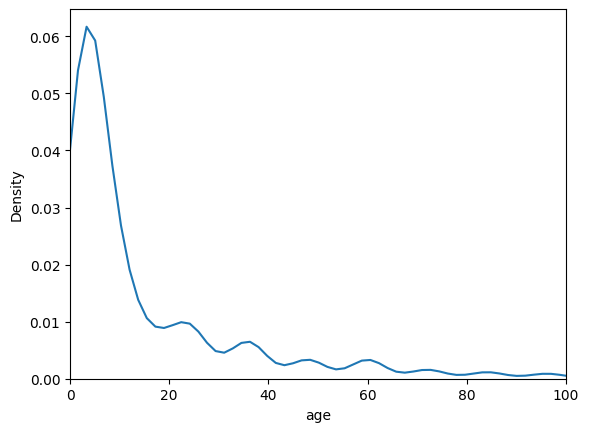

D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].clip(upper=13)
D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы


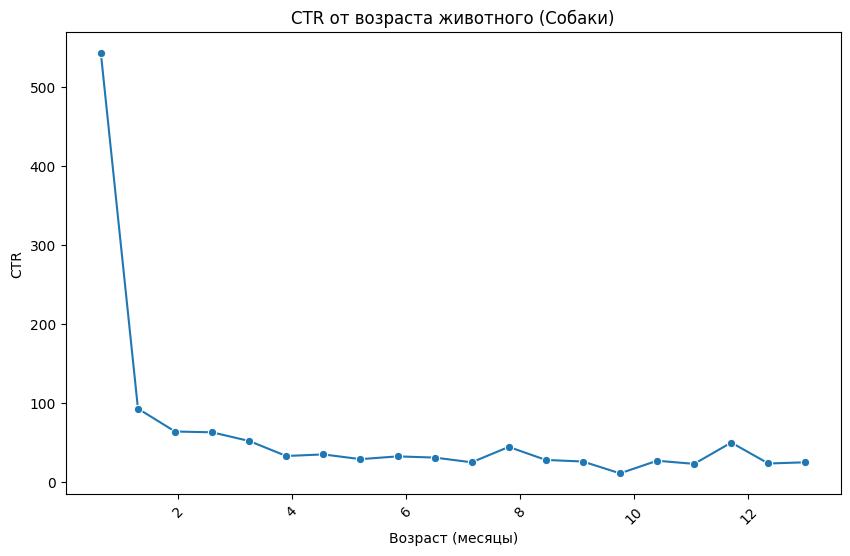

D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы


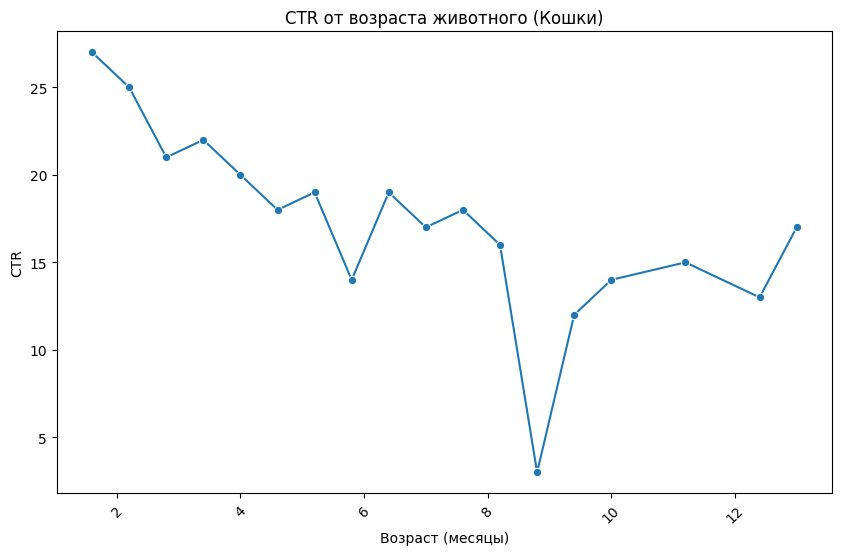

In [310]:
# Удаление NaN значений
df = df.dropna(subset=['category', 'age', 'description_length', 'CTR'])
sns.kdeplot(df['age'])
plt.xlim(0, 100)
plt.show()
df['age'] = df['age'].clip(upper=13)

group_dfs = []

def plot_line(x, y, title, xlabel, ylabel, df=df):

    # Создание интервалов для оси X
    df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы
    # Вычисление среднего значения Y для каждого интервала
    median_data = df.groupby('x_bins')[y].median().reset_index()  # Группировка и расчет среднего
    median_data = median_data.dropna()

    group_dfs.append(pd.DataFrame(median_data))
    # Проверка на наличие данных в median_data
    if median_data.empty:
        print("Нет данных для построения графика.")
        return

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=median_data, x='x_bins', y=y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.show()

plot_line('age', 'CTR', 'CTR от возраста животного (Собаки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Собаки'])
plot_line('age', 'CTR', 'CTR от возраста животного (Кошки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Кошки'])

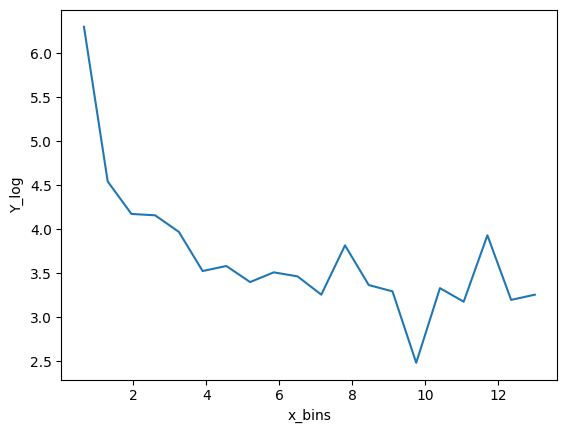

                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     14.64
Date:                Sat, 14 Dec 2024   Prob (F-statistic):            0.00124
Time:                        01:19:14   Log-Likelihood:                -16.505
No. Observations:                  20   AIC:                             37.01
Df Residuals:                      18   BIC:                             39.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5949      0.270     16.991      0.0

In [295]:
import statsmodels.api as sm


X = group_dfs[0]['x_bins'] # Независимые переменные
Y = group_dfs[0]['CTR'] # Зависимая переменная

group_dfs[0]['Y_log'] = np.log(group_dfs[0]['CTR'] + 1)
Y = group_dfs[0]['Y_log'] 

sns.lineplot(x=X, y=Y)
plt.show()

# Добавляем константу к независимым переменным
X = sm.add_constant(X)

# Создаем модель OLS
model = sm.OLS(Y, X)

# Подгоняем модель
results = model.fit()

# Выводим результаты
print(results.summary())

In [296]:
# Метод IQR для определения выбросов
Q1 = group_dfs[1]['CTR'].quantile(0.25)
Q3 = group_dfs[1]['CTR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

group_dfs[1] = group_dfs[1][(group_dfs[1]['CTR'] >= lower_bound) & (group_dfs[1]['CTR'] <= upper_bound)]

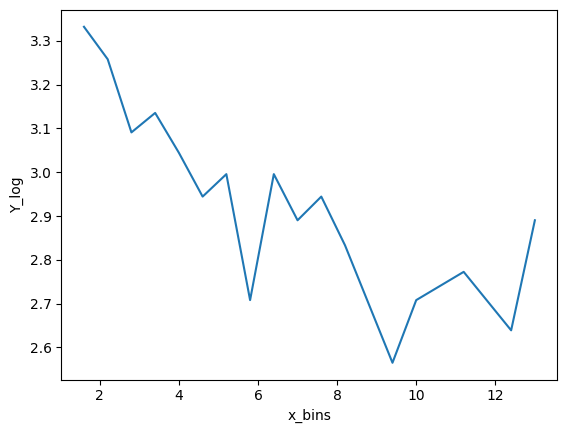

                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     26.52
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           0.000119
Time:                        01:19:14   Log-Likelihood:                 11.486
No. Observations:                  17   AIC:                            -18.97
Df Residuals:                      15   BIC:                            -17.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2479      0.070     46.353      0.0

d:\3\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


In [297]:
import statsmodels.api as sm


X = group_dfs[1]['x_bins'] # Независимые переменные
Y = group_dfs[1]['CTR'] # Зависимая переменная

group_dfs[1]['Y_log'] = np.log(group_dfs[1]['CTR'] + 1)
Y = group_dfs[1]['Y_log'] 

sns.lineplot(x=X, y=Y)
plt.show()

# Добавляем константу к независимым переменным
X = sm.add_constant(X)

# Создаем модель OLS
model = sm.OLS(Y, X)

# Подгоняем модель
results = model.fit()

# Выводим результаты
print(results.summary())